In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

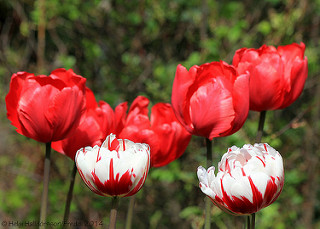

In [7]:
PIL.Image.open(str(roses[50]))

In [8]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

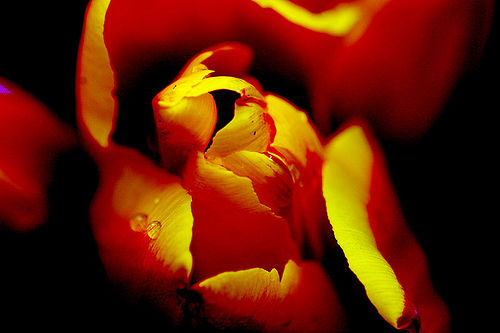

In [9]:
PIL.Image.open(tulips[8])

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))  #cv2 excepts string arguments only
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
y[700:710]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
#scaling 
X_train_scaled = X_train/255
y_train_scaled = y_train/255

In [48]:
X_train_scaled[1]  #normalised array is between range 0 to 1

array([[[0.54509804, 0.54901961, 0.51764706],
        [0.15686275, 0.63529412, 0.3254902 ],
        [0.04705882, 0.33333333, 0.2       ],
        ...,
        [0.        , 0.        , 0.00392157],
        [0.01568627, 0.03921569, 0.03529412],
        [0.        , 0.01960784, 0.01568627]],

       [[0.25490196, 0.54509804, 0.37254902],
        [0.08627451, 0.25098039, 0.21568627],
        [0.33333333, 0.45882353, 0.4       ],
        ...,
        [0.00392157, 0.        , 0.        ],
        [0.01568627, 0.01960784, 0.01960784],
        [0.        , 0.01176471, 0.00784314]],

       [[0.05098039, 0.25098039, 0.07058824],
        [0.10196078, 0.31372549, 0.25882353],
        [0.09019608, 0.5254902 , 0.27058824],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.03137255, 0.04705882, 0.04313725],
        [0.01568627, 0.03529412, 0.03529412]],

       ...,

       [[0.14117647, 0.56078431, 0.70980392],
        [0.13333333, 0.23137255, 0.54901961],
        [0.29411765, 0

In [49]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.3006 - loss: 1.6569
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.5810 - loss: 1.0765
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.6643 - loss: 0.8782
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 313ms/step - accuracy: 0.6969 - loss: 0.7827
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.7648 - loss: 0.6289
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 331ms/step - accuracy: 0.8712 - loss: 0.3992
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 326ms/step - accuracy: 0.9279 - loss: 0.2474
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.9594 - loss: 0.1516
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 288ms/step - accuracy: 0.9836 - loss: 0.0721
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.9959 - loss: 0.0320


In [51]:
X_test_scaled = X_test/255
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6820 - loss: 1.6020


[1.6281992197036743, 0.671023964881897]

this is the example of overfitting because model is performing good on training data but not performing well on test data

In [64]:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.5,0.7),
    layers.RandomRotation(factor=0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

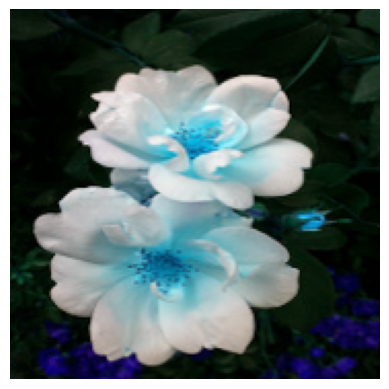

In [56]:
plt.axis('off')
plt.imshow(X[0])

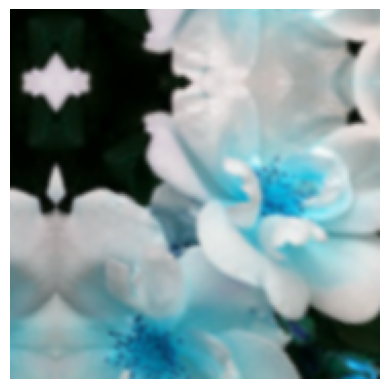

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [74]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)   

Epoch 1/10


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.3229 - loss: 1.5229
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.5095 - loss: 1.1532
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 350ms/step - accuracy: 0.5730 - loss: 1.0230
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 320ms/step - accuracy: 0.6306 - loss: 0.9488
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 305ms/step - accuracy: 0.6408 - loss: 0.9191
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 364ms/step - accuracy: 0.6585 - loss: 0.8825
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 396ms/step - accuracy: 0.6756 - loss: 0.8707
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - accuracy: 0.6663 - loss: 0.8558
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - accuracy: 0.6758 - loss: 0.8340
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - accuracy: 0.6747 - loss: 0.8426


In [75]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6961 - loss: 0.7927


[0.8201206922531128, 0.6895424723625183]

In [82]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step


In [83]:
y_pred

array([[1.5905257e-03, 9.9493235e-01, 1.5914080e-03, 7.1104133e-04,
        1.1746477e-03],
       [5.2583158e-01, 5.6127395e-02, 1.4482848e-03, 9.8206224e-03,
        4.0677208e-01],
       [1.0841021e-02, 2.5501119e-02, 9.5411038e-01, 5.1080756e-04,
        9.0366816e-03],
       ...,
       [9.4503602e-03, 1.5454440e-03, 2.6425079e-02, 9.1807669e-01,
        4.4502389e-02],
       [2.8014821e-01, 1.8100411e-01, 3.4499884e-01, 6.9546043e-03,
        1.8689422e-01],
       [1.3990706e-01, 7.3165731e-03, 1.8173169e-01, 3.4502324e-01,
        3.2602143e-01]], dtype=float32)

In [84]:
y_pred_classes = [np.argmax(element) for element in y_pred]  #getting index of max element

In [85]:
print("Classification Report \n", classification_report(y_test, y_pred_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.51      0.58       176
           1       0.73      0.67      0.70       154
           2       0.76      0.74      0.75       226
           3       0.65      0.87      0.74       150
           4       0.63      0.67      0.65       212

    accuracy                           0.69       918
   macro avg       0.69      0.69      0.69       918
weighted avg       0.69      0.69      0.69       918



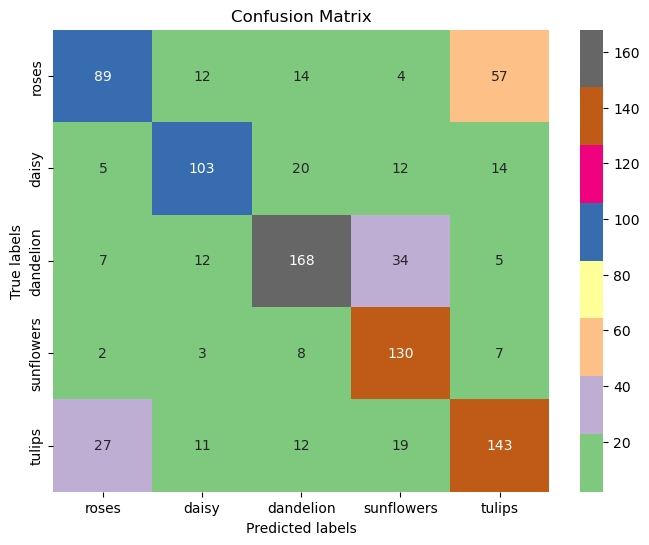

In [91]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Accent", fmt="d", xticklabels=flowers_images_dict, yticklabels=flowers_images_dict)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()